In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gmplot 
import statistics

## - Data load

In [2]:
train = pd.read_csv('data/total_rent.csv')
train = train.iloc[:,1:]
tashu = pd.read_csv('data/tashu.csv')
station = pd.read_csv('data/station.csv')

## - 계절별 대여량

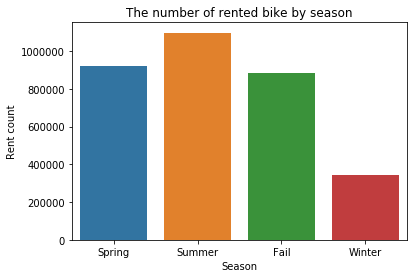

In [3]:
group_season = train.groupby(['SEASON'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_season['SEASON'] , y=group_season['RENTCOUNT'])
ax.set(xlabel='Season' , ylabel = 'Rent count')
season = ['Spring', 'Summer' , 'Fail', 'Winter']
plt.xticks(np.arange(4) , season)
plt.title('The number of rented bike by season')
plt.show()

## - 요일별 대여량

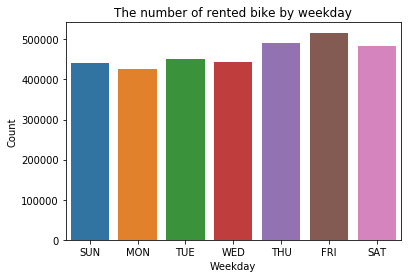

In [4]:
group_weekday = train.groupby(['WEEKDAY'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_weekday['WEEKDAY'] , y = group_weekday['RENTCOUNT'])
ax.set(xlabel = 'Weekday' , ylabel = 'Count')
weekday = ['SUN' , 'MON' , 'TUE' , 'WED','THU','FRI','SAT']
plt.xticks(np.arange(7), weekday)
plt.title('The number of rented bike by weekday')
plt.show()

## - 월별 대여량

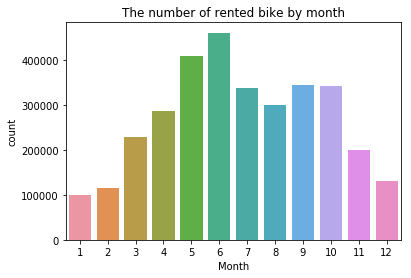

In [5]:

group_mn = train.groupby(['MONTH'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_mn['MONTH'] , y=group_mn['RENTCOUNT'])
ax.set(xlabel ='Month' , ylabel = 'count')
plt.title('The number of rented bike by month')
plt.show()

## - 시간별 대여량

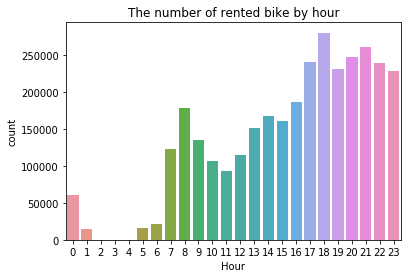

In [6]:

group_hr = train.groupby(['HOUR'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_hr['HOUR'] , y=group_hr['RENTCOUNT'])
ax.set(xlabel ='Hour' , ylabel = 'count')
plt.title('The number of rented bike by hour')
plt.show()

## - 인기 경로 Top 10

### Data Preprocessing

In [7]:
tashu.dropna(axis= 0)
tashu = tashu[tashu['RENT_STATION'] <= 144 ]
tashu = tashu[tashu['RETURN_STATION'] <= 144 ]

In [8]:
tashu = tashu[['RENT_STATION' , 'RETURN_STATION']]

In [9]:
tashu = tashu.groupby(['RENT_STATION','RETURN_STATION'])

In [10]:
tashu = tashu.size().to_frame('SUM').reset_index()

In [11]:
tashu

,RENT_STATION,RETURN_STATION,SUM
0,1.0,1.0,14489
1,1.0,2.0,660
2,1.0,3.0,6135
3,1.0,4.0,851
4,1.0,5.0,802
5,1.0,6.0,289
6,1.0,7.0,666
7,1.0,8.0,549
8,1.0,9.0,281
9,1.0,10.0,681


### 대여, 반납 인기 Top 10 가져오기

In [12]:
top = tashu['SUM'].nlargest(10)

In [13]:
top

287      84496
4155     21749
7488     18343
2876     17220
0        14489
4300     12177
13471    12154
4441     11973
2242     11966
7464     11868
Name: SUM, dtype: int64

In [14]:
top_course = []

for i in top.index :
    place = []
    place.append(tashu.loc[i,'RENT_STATION'])
    place.append(tashu.loc[i,'RETURN_STATION'])
    top_course.append(place)

In [15]:
top_course

[[3.0, 3.0],
 [31.0, 31.0],
 [56.0, 56.0],
 [21.0, 105.0],
 [1.0, 1.0],
 [32.0, 32.0],
 [105.0, 21.0],
 [33.0, 33.0],
 [17.0, 17.0],
 [56.0, 32.0]]

## Map 경로 표시

In [73]:
import gmplot
import statistics

#변수
top10_lat = []
top10_lon = []
for i in top_course :
    sp = station.iloc[int(i[0]-1),7].split(',')
    top10_lat.append(float(sp[0]))
    top10_lon.append(float(sp[1]))
    sp2 = station.iloc[int(i[1]-1),7].split(',')
    top10_lat.append(float(sp2[0]))
    top10_lon.append(float(sp2[1]))

In [84]:
gmapl = gmplot.GoogleMapPlotter(statistics.median(top10_lat) , statistics.median(top10_lon) , 14)
for i in range(0, len(top10_lat) , 2) :
    rent_return_lat = top10_lat[i:i+2]
    rent_return_lon = top10_lon[i:i+2]
    #gmapl.plot(rent_return_lat, rent_return_lon, 'cornflowerblue', edge_width = 3.0)
    gmapl.polygon(rent_return_lat, rent_return_lon, 'cornflowerblue', edge_width = 3.0)
    gmapl.scatter(rent_return_lat, rent_return_lon , '#FF0000' ,size = 30 ,marker=False )
gmapl.draw("top10.html")